In [1]:
snapshotInputFile  = "../build/snapshots.in"
snapshotOutputFile = "../build/snapshots.out"

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def file_length(file_name):
    with open(file_name) as f:
        i = -1
        for i, l in enumerate(f):
            pass
        return i+1

# Read in requested snapshot times from input file
n_input_lines = file_length(snapshotInputFile)
snapshot_times = np.zeros(n_input_lines-1)
f = open(snapshotInputFile, 'r')
snapshot_dt = float(f.readline())
for i in range(n_input_lines-1):
    snapshot_times[i] = float(f.readline())
f.close()

# Read in snapshot output file
n_output_lines = file_length(snapshotOutputFile)
data = np.zeros((n_output_lines, 8))
with open(snapshotOutputFile, 'r') as f:
    for i, line in enumerate(f):
        line_list = line.split(" ")
        time   = float(line_list[0][:-1])
        energy = float(line_list[1][:-1])
        position_vector = (line_list[2][1:-2]).split(",")
        momentum_vector = (line_list[3][1:-2]).split(",")
        x,  y,  z  = np.array(position_vector).astype("float")  
        px, py, pz = np.array(momentum_vector).astype("float")
        data[i,0] = time
        data[i,1] = energy
        data[i,2] = x
        data[i,3] = y
        data[i,4] = z
        data[i,5] = px
        data[i,6] = py
        data[i,7] = pz

# print snapshot_dt
# print snapshot_times
# print data

In [2]:
snapshots = []
for i in range(len(snapshot_times)):
    t  = snapshot_times[i]
    snapshot_indices = np.where((t <= np.array(data[:,0])) & (np.array(data[:,0])<= t + snapshot_dt))
    n_UCNs_at_snapshot = len(snapshot_indices[0])
    temp = np.zeros((n_UCNs_at_snapshot,3))
    for j in range(n_UCNs_at_snapshot):
        data_row = data[snapshot_indices[0][j],:]
        temp[j,0] = data_row[2] # x
        temp[j,1] = data_row[3] # y
        temp[j,2] = data_row[4] # z
    snapshots.append(temp)

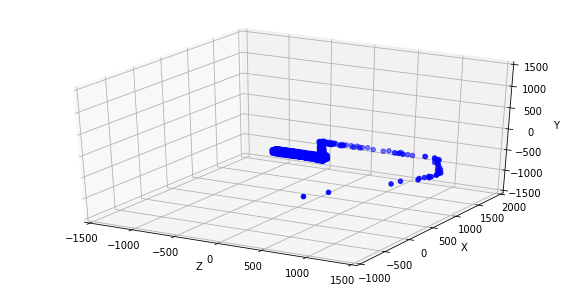

In [10]:
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = 10, 5

view_range = 3000   # mm
x_view_center = 500 # mm
y_view_center = 0   # mm
z_view_center = 0   # mm

which_snapshot = 1
xs = snapshots[which_snapshot][:,0]
ys = snapshots[which_snapshot][:,1]
zs = snapshots[which_snapshot][:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(zs, xs, ys, color='b')
    
ax.set_xlabel('Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')

ax.set_xlim((-view_range/2+z_view_center,+view_range/2+z_view_center)) # z
ax.set_ylim((-view_range/2+x_view_center,+view_range/2+x_view_center)) # x
ax.set_zlim((-view_range/2+y_view_center,+view_range/2+y_view_center)) # y

plt.show()

In [11]:
cloud = np.zeros((len(xs),3))
cloud[:,0] = xs
cloud[:,1] = ys
cloud[:,2] = zs
np.save("cloud", cloud)